# Data Cleaning and EDA

This notebook's goal is to clean the NHANES (August 2021 - August 2023) dataset to prepare it for use in a machine learning model aimed at predicting diabetes risk.

### Key Columns
SEQN - Respondent sequence number

## Table of Contents
1. [Importing Libraries](#import-libraries)
2. [Loading the Dataset](#loading-the-dataset)
3. [Initial Data Exploration](#data-exploration)
4. [Data Cleaning](#data-cleaning)
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)


# Import Libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 
import seaborn as sns
import sys
import os

# Import functions
notebook_dir = os.getcwd()
src_path = os.path.join(notebook_dir, '../src')
sys.path.append(src_path)
from data_cleaning import *

# Loading the dataset

In [2]:
folder_path = '../data/raw/csv_files/'

# list csv files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

merged_df = None
# Load each csv file into a pandas dataframe and merge on 'SEQN' column
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)

    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='SEQN', how='inner')

# Data Exploration

In [3]:
# Check merged dataframe structure
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337 entries, 0 to 6336
Columns: 106 entries, SEQN to LBDTCSI
dtypes: float64(104), object(2)
memory usage: 5.1+ MB


In [4]:
# Show the first 5 rows of the merged dataframe
merged_df.head()

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,ALQ170,BPQ020,...,SMQ040,SMD641,SMD650,SMD100MN,SMQ621,SMD630,SMAQUEX2,WTPH2YR,LBXTC,LBDTCSI
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,1.0,56042.129410,264.0,6.83
1,130379.0,1.0,2.0,3.0,0.0,NaN,NaN,2.0,NaN,1.0,...,3.0,NaN,NaN,NaN,NaN,NaN,1.0,37435.705647,214.0,5.53
2,130380.0,1.0,10.0,1.0,0.0,NaN,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,85328.844519,187.0,4.84
3,130386.0,1.0,4.0,2.0,10.0,0.0,10.0,2.0,0.0,2.0,...,3.0,NaN,NaN,NaN,NaN,NaN,1.0,44526.214135,183.0,4.73
4,130387.0,1.0,0.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22746.296353,203.0,5.25


In [5]:
# Check for missing values
merged_df.isnull().sum()

SEQN           0
ALQ111       856
ALQ121      1415
ALQ130      2268
ALQ142      2255
            ... 
SMD630      6337
SMAQUEX2       0
WTPH2YR        0
LBXTC        620
LBDTCSI      620
Length: 106, dtype: int64

In [6]:
# Summary statistics
merged_df.describe()   

,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ151,ALQ170,BPQ020,...,SMQ040,SMD641,SMD650,SMD100MN,SMQ621,SMD630,SMAQUEX2,WTPH2YR,LBXTC,LBDTCSI
count,6337.000000,5481.000000,4922.000000,4069.000000,4082.000000,2366.000000,2362.000000,4901.000000,2358.000000,6337.000000,...,2518.000000,191.000000,912.000000,912.000000,0.0,0.0,6337.0,6337.000000,5717.000000,5717.000000
mean,136348.738362,1.109104,5.030679,5.842959,4.742283,4.838123,3.545301,1.821261,4.396098,1.637841,...,2.339952,14.015707,18.188596,0.418860,NaN,NaN,1.0,40024.873091,186.974637,4.835153
std,3439.132476,0.385114,4.314321,54.996448,7.326042,7.785415,7.133496,0.458352,45.252453,0.516130,...,0.901815,15.099835,80.499562,0.633839,NaN,NaN,0.0,31504.418240,42.666181,1.103440
min,130378.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,NaN,NaN,1.0,0.000000,62.000000,1.600000
25%,133337.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,1.000000,4.000000,5.000000,0.000000,NaN,NaN,1.0,19228.917397,157.000000,4.060000
50%,136397.000000,1.000000,5.000000,2.000000,4.000000,4.000000,0.000000,2.000000,1.000000,2.000000,...,3.000000,12.000000,10.000000,0.000000,NaN,NaN,1.0,31687.062804,184.000000,4.760000
75%,139310.000000,1.000000,8.000000,3.000000,9.000000,9.000000,7.000000,2.000000,2.000000,2.000000,...,3.000000,20.000000,20.000000,1.000000,NaN,NaN,1.0,50785.688486,213.000000,5.510000
max,142310.000000,9.000000,99.000000,999.000000,99.000000,99.000000,99.000000,9.000000,999.000000,9.000000,...,3.000000,99.000000,999.000000,9.000000,NaN,NaN,1.0,241728.857241,438.000000,11.330000


# Data Cleaning

## Get rid of Irrelevant Columns

Columns to be used: 

In [7]:
filtered_df = filter_columns(merged_df)
filtered_df.describe()

,SEQN,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,DMDMARTZ,DMDHHSIZ,INDFMPIR,LBDTCSI,DIQ010,...,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ040
count,6337.000000,6337.000000,6337.000000,6337.000000,6064.000000,6063.000000,6337.000000,5.506000e+03,5717.000000,6337.000000,...,5518.000000,5516.000000,5514.000000,5513.000000,5510.000000,5508.000000,5508.000000,5506.000000,4167.000000,2518.000000
mean,136348.738362,52.325548,3.309768,1.201673,3.839380,1.725383,2.624586,2.893249e+00,4.835153,1.899006,...,0.478615,0.793510,0.860174,0.504263,0.411071,0.394880,0.216594,0.082092,0.479242,2.339952
std,3439.132476,18.280888,1.400246,0.401281,1.144338,2.500998,1.485297,1.660074e+00,1.103440,0.412357,...,0.838724,1.003693,0.965127,0.860577,0.786979,0.767524,0.685077,0.438164,0.740106,0.901815
min,130378.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,133337.000000,37.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.380000e+00,4.060000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,136397.000000,56.000000,3.000000,1.000000,4.000000,1.000000,2.000000,2.790000e+00,4.760000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,139310.000000,67.000000,3.000000,1.000000,5.000000,2.000000,4.000000,4.940000e+00,5.510000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,142310.000000,80.000000,7.000000,2.000000,9.000000,99.000000,7.000000,5.000000e+00,11.330000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


## Handle Missing Values

Convert 'declined' and 'refused' responses to NaN

In [8]:
filtered_df = convert_to_null(filtered_df)

### Columns that are more than 50% null

In [9]:
total_rows = len(filtered_df)

# Count null values and count of values equal to 999 and 99 for each column
null_counts = filtered_df.isnull().sum()
more_null = (filtered_df == 999).sum()
nine_nine_null = (filtered_df == 99).sum()

cols_to_drop = []

for col in filtered_df.columns:
    if null_counts[col] > 0.5 * total_rows or more_null[col] > 0.5 * total_rows or nine_nine_null[col] > 0.5 * total_rows:
        cols_to_drop.append(col)

cols_to_drop

['DID040', 'BPQ150', 'PAD810U', 'ALQ280', 'SMQ040']

#### Columns with over half null values

1. DID040: Age when first told you had diabetes
    - Will be left as null as this likely means they do not have diabetes at all.
2. BPQ150: taking high blood pressure medication
    - Missing values will be imputed with mode value.
3. PAD810U: Vigorous Leisure Time Physical Activity (LTPA) unit day/week/month/year
    - Missing values could indivate respondents do not engage in this specific physical activity.
4. ALQ280: # of times 8+ drinks in 1 day/past 12 months
    - Missing data with 0.
5. SMQ040: Do you now smoke cigarettes?
    - Missing values are filled with 0 as it likely means they are non-smokers.
6. SMD641: # days smoked cigarettes during past 30 days
    - Missing values are filled with 0 as it likely means they are non-smokers.


In [10]:
# Replace 99 and 999 with NaN
filtered_df.loc[:, :] = filtered_df.replace([99, 999], np.nan)

fill_vals = {
    'BPQ150': filtered_df['BPQ150'].mode()[0],
    'PAD810U': 0,
    'ALQ280': 0,
    'SMQ040': 0,
    'SMD641': 0 
}

filtered_df.loc[:, :] = filtered_df.fillna(value=fill_vals)

#### Percentage of Null Values in each Column

In [11]:
null_percentage = filtered_df.isnull().mean() * 100
null_percentage[null_percentage > 0]

DMDEDUC2     4.371154
DMDMARTZ     4.386934
INDFMPIR    13.113461
LBDTCSI      9.783809
DIQ010       0.015780
DID040      86.507811
DIQ160      17.421493
DBQ940       0.015780
DBQ945       0.015780
BPQ020       0.063121
BPQ080       0.552312
BPQ101D      0.410289
PAD680       0.741676
PAD790U     20.609121
ALQ130      36.010731
ALQ142      35.900268
INDFMMPC     8.205776
DPQ010      13.160802
DPQ020      13.034559
DPQ030      13.018779
DPQ040      13.066120
DPQ050      13.050339
DPQ060      13.081900
DPQ070      13.097680
DPQ080      13.208143
DPQ090      13.192362
DPQ100      34.290674
dtype: float64

### Handling Missing Data Based on Percentage

Columns less than 10% null

In [12]:
null_percentage[(null_percentage < 10) & (null_percentage > 0)]

DMDEDUC2    4.371154
DMDMARTZ    4.386934
LBDTCSI     9.783809
DIQ010      0.015780
DBQ940      0.015780
DBQ945      0.015780
BPQ020      0.063121
BPQ080      0.552312
BPQ101D     0.410289
PAD680      0.741676
INDFMMPC    8.205776
dtype: float64

In [13]:
fill_vals = {
    'DMDEDUC2': filtered_df['DMDEDUC2'].mode()[0],
    'DMDMARTZ': filtered_df['DMDMARTZ'].mode()[0],
    'LBDTCSI': filtered_df['LBDTCSI'].mean(),
    'DIQ010': filtered_df['DIQ010'].mode()[0],
    'DBQ940': filtered_df['DBQ940'].mean(),
    'DBQ945': filtered_df['DBQ945'].mean(),
    'BPQ020': filtered_df['BPQ020'].mode()[0],
    'BPQ080': filtered_df['BPQ080'].mode()[0],
    'BPQ101D': filtered_df['BPQ101D'].mode()[0],
    'PAD680': filtered_df['PAD680'].mode()[0],
    'INDFMMPC': filtered_df['INDFMMPC'].mean(),
}

filtered_df = filtered_df.fillna(value=fill_vals)

Columns more than 10% and less than 20% null

In [14]:
null_percentage[(null_percentage < 20) & (null_percentage > 10)]

INDFMPIR    13.113461
DIQ160      17.421493
DPQ010      13.160802
DPQ020      13.034559
DPQ030      13.018779
DPQ040      13.066120
DPQ050      13.050339
DPQ060      13.081900
DPQ070      13.097680
DPQ080      13.208143
DPQ090      13.192362
dtype: float64

In [15]:
# Depression Screening columns values 7 'Refused' and 9 'Don't know' are considered as missing values
dpq_cols = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']
filtered_df.loc[:, dpq_cols] = filtered_df[dpq_cols].replace({7: np.nan, 9: np.nan})

In [16]:
# Impute DPQ missing values with mode
dpq_imputer = SimpleImputer(strategy='most_frequent')
filtered_df[dpq_cols] = dpq_imputer.fit_transform(filtered_df[dpq_cols])

# Impute missing values with mean for 'INDFMPIR' (ensure it's flattened after transform)
mean_imputer = SimpleImputer(strategy='mean')
filtered_df['INDFMPIR'] = mean_imputer.fit_transform(filtered_df[['INDFMPIR']])

# Impute missing values with mode for 'DIQ160'
mode_imputer = SimpleImputer(strategy='most_frequent')
filtered_df['DIQ160'] = mode_imputer.fit_transform(filtered_df[['DIQ160']]).ravel()

Columns more than 20% null and less than 40% null

In [17]:
null_percentage[(null_percentage < 40) & (null_percentage > 20)]

PAD790U    20.609121
ALQ130     36.010731
ALQ142     35.900268
DPQ100     34.290674
dtype: float64

In [18]:
# Replace 777, 999, 77, and 99 with NaN for ALQ130 and ALQ142
filtered_df.loc[:, 'ALQ130'] = filtered_df['ALQ130'].replace([777, 999], np.nan)
filtered_df.loc[:, 'ALQ142'] = filtered_df['ALQ142'].replace([77, 99], np.nan)

# Median Imputation for ALQ130 
mean_imputer = SimpleImputer(strategy='median')
filtered_df.loc[:, 'ALQ130'] = mean_imputer.fit_transform(filtered_df[['ALQ130']])

# Mode imputation for ALQ142, PAD790U and DPQ100
mode_imputer = SimpleImputer(strategy='most_frequent')
filtered_df.loc[:, 'ALQ142'] = mode_imputer.fit_transform(filtered_df[['ALQ142']])
filtered_df.loc[:, 'PAD790U'] = mode_imputer.fit_transform(filtered_df[['PAD790U']])
filtered_df.loc[:, 'DPQ100'] = mode_imputer.fit_transform(filtered_df[['DPQ100']])


Columns more than 40% null

In [19]:
null_percentage[(null_percentage > 40)]

DID040    86.507811
dtype: float64

In [20]:
null_percentage = filtered_df.isnull().mean() * 100
null_percentage[null_percentage > 0]

DID040    86.507811
dtype: float64

## Handle Duplicates

In [21]:
filtered_df.drop_duplicates(inplace=True)

In [22]:
filtered_df.columns

Index(['SEQN', 'RIDAGEYR', 'RIDRETH3', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ',
       'DMDHHSIZ', 'INDFMPIR', 'LBDTCSI', 'DIQ010', 'DID040', 'DIQ160',
       'DBQ930', 'DBQ940', 'DBQ945', 'BPQ020', 'BPQ080', 'BPQ101D', 'BPQ150',
       'PAD680', 'PAD810U', 'PAD790U', 'ALQ130', 'ALQ142', 'ALQ280',
       'INDFMMPC', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'SMQ040'],
      dtype='object')

In [23]:
filtered_df.describe(include = 'all')

,SEQN,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,DMDMARTZ,DMDHHSIZ,INDFMPIR,LBDTCSI,DIQ010,...,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ040
count,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6.337000e+03,6337.000000,6337.000000,...,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,136348.738362,52.325548,3.309768,1.201673,3.886855,1.635632,2.624586,2.893249e+00,4.835153,1.897901,...,0.403503,0.681711,0.738046,0.434433,0.351270,0.339593,0.172479,0.064226,0.306454,0.929777
std,3439.132476,18.280888,1.400246,0.401281,1.137062,0.790537,1.485297,1.547385e+00,1.048063,0.402592,...,0.732459,0.941218,0.906900,0.799010,0.716428,0.709913,0.534551,0.323447,0.589907,1.278448
min,130378.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133337.000000,37.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.580000e+00,4.160000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136397.000000,56.000000,3.000000,1.000000,4.000000,1.000000,2.000000,2.893249e+00,4.835153,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139310.000000,67.000000,3.000000,1.000000,5.000000,2.000000,4.000000,4.490000e+00,5.400000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


# Standardize and combine categories for RIDRETH3

In [24]:
# Combine Mexican and Other Hispanic into Hispanic
filtered_df.loc[filtered_df['RIDRETH3'].isin(['Mexican American', 'Other Hispanic']), 'RIDRETH3'] = 'Hispanic'
print(filtered_df['RIDRETH3'].unique())

[6.0 3.0 2.0 1.0 4.0 7.0]


C:\Users\lizbe\AppData\Local\Temp\ipykernel_4060\2175979322.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Hispanic' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filtered_df.loc[filtered_df['RIDRETH3'].isin(['Mexican American', 'Other Hispanic']), 'RIDRETH3'] = 'Hispanic'


# Save CSV file

In [25]:
#filtered_df.to_csv('../data/cleaned/nhanes_cleaned.csv', index=False)

# Exploratory Data Analysis

In [26]:
filtered_df = map_cat_vars(filtered_df)

In [27]:
filtered_df.head()

,SEQN,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,DMDMARTZ,DMDHHSIZ,INDFMPIR,LBDTCSI,DIQ010,...,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,SMQ040
0,130378.0,43.0,Non-Hispanic Asian,"Born in Other Countries, including U.S. territ...",College graduate or above,Married/Living with partner,4,5.00,6.83,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,Not at all
1,130379.0,66.0,Non-Hispanic White,"Born in 50 US States or Washington, DC",College graduate or above,Married/Living with partner,2,5.00,5.53,No,...,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,Not at all
2,130380.0,44.0,Other Hispanic,"Born in Other Countries, including U.S. territ...",High school graduate/GED or equivalent,Married/Living with partner,7 or more people,1.41,4.84,Yes,...,Not at all,Several days,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN
3,130386.0,34.0,Mexican American,"Born in 50 US States or Washington, DC",Some college or AA degree,Married/Living with partner,3,1.33,4.73,No,...,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Not at all,Not at all,Not difficult at all,Not at all
4,130387.0,68.0,Non-Hispanic White,"Born in 50 US States or Washington, DC",College graduate or above,Never married,1,1.32,5.25,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all,NaN


In [28]:
filtered_df.describe()

,SEQN,RIDAGEYR,INDFMPIR,LBDTCSI,DID040,PAD680,ALQ130
count,6337.000000,6337.000000,6.337000e+03,6337.000000,855.000000,6337.000000,6337.000000
mean,136348.738362,52.325548,2.893249e+00,4.835153,49.076023,364.192205,2.405081
std,3439.132476,18.280888,1.547385e+00,1.048063,13.713703,208.460233,1.801951
min,130378.000000,18.000000,5.397605e-79,1.600000,6.000000,0.000000,1.000000
25%,133337.000000,37.000000,1.580000e+00,4.160000,40.000000,240.000000,2.000000
50%,136397.000000,56.000000,2.893249e+00,4.835153,50.000000,300.000000,2.000000
75%,139310.000000,67.000000,4.490000e+00,5.400000,59.000000,480.000000,2.000000
max,142310.000000,80.000000,5.000000e+00,11.330000,80.000000,1380.000000,15.000000


## Individual features

### Numerical Columns

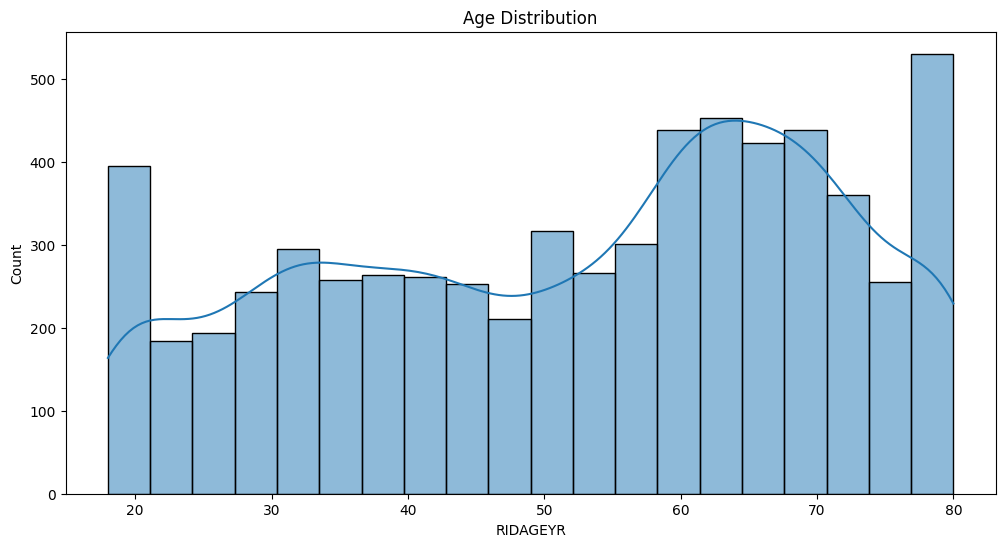

In [29]:
# Histogram for Age (RIDAGEYR)
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['RIDAGEYR'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

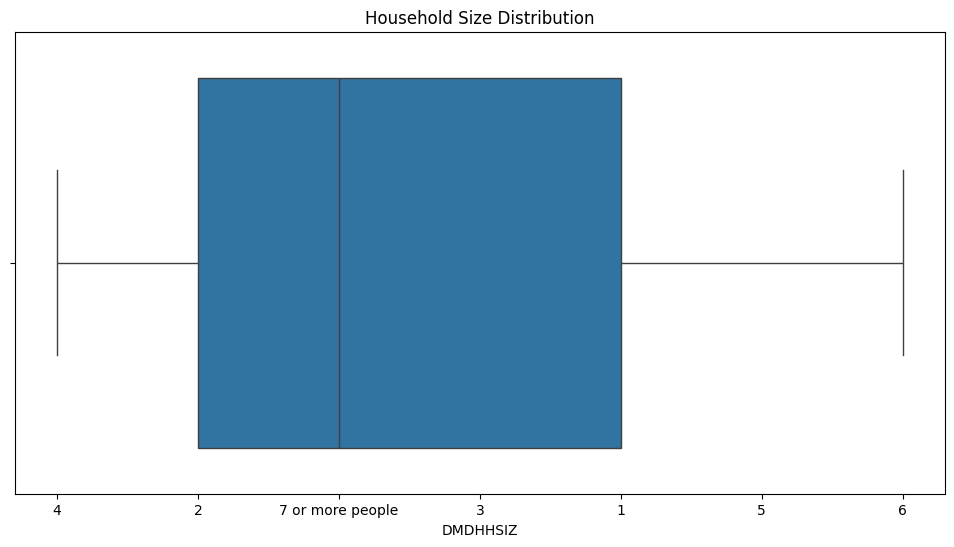

In [30]:
# Boxplot to check for outliers in household size (DMDHHSIZ)
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_df['DMDHHSIZ'])
plt.title('Household Size Distribution')
plt.show()

No outliers to note, 2-3 people in the household is where 50% of the responses are

### Categorical Columns

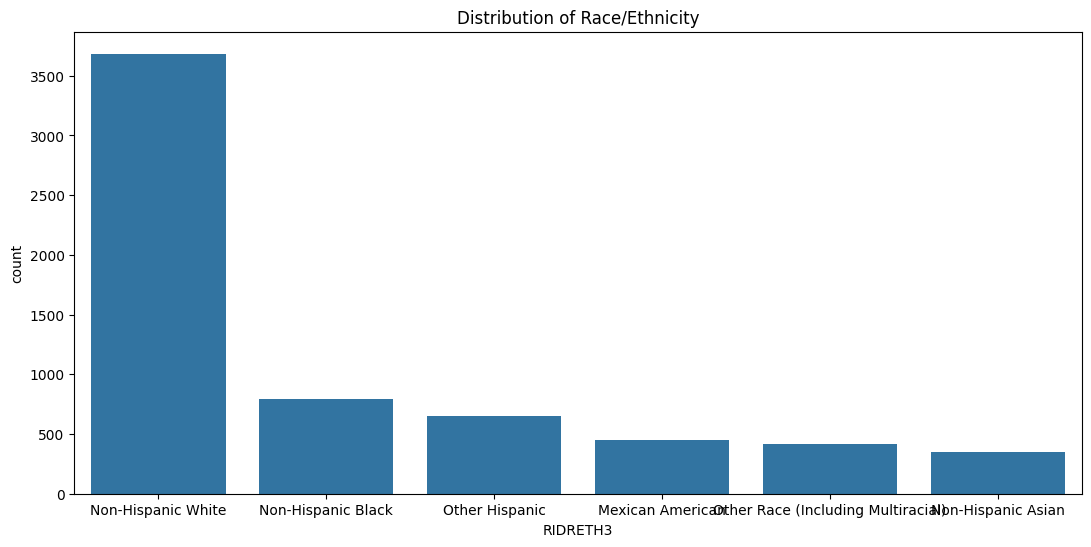

In [31]:
# Plot for Race/Ethnicity (RIDRETH3)
plt.figure(figsize=(13, 6))
sns.countplot(x=filtered_df.get('RIDRETH3'), order=filtered_df['RIDRETH3'].value_counts().index)
plt.title('Distribution of Race/Ethnicity')
plt.show()

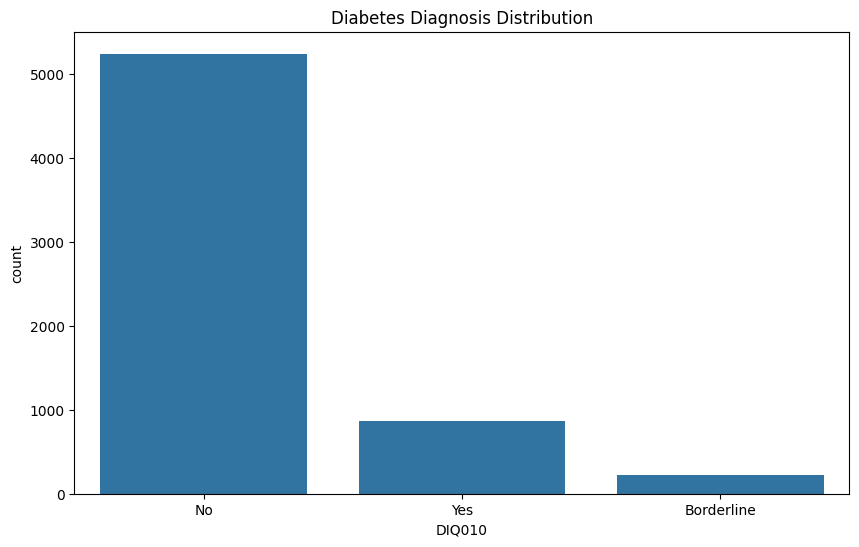

In [32]:
# Plot for Diabetes Diagnosis (DIQ010)
plt.figure(figsize=(10, 6))
sns.countplot(x=filtered_df['DIQ010'])
plt.title('Diabetes Diagnosis Distribution')
plt.show()

## Relationships between features

### Correlation Matrix for Numerical Features

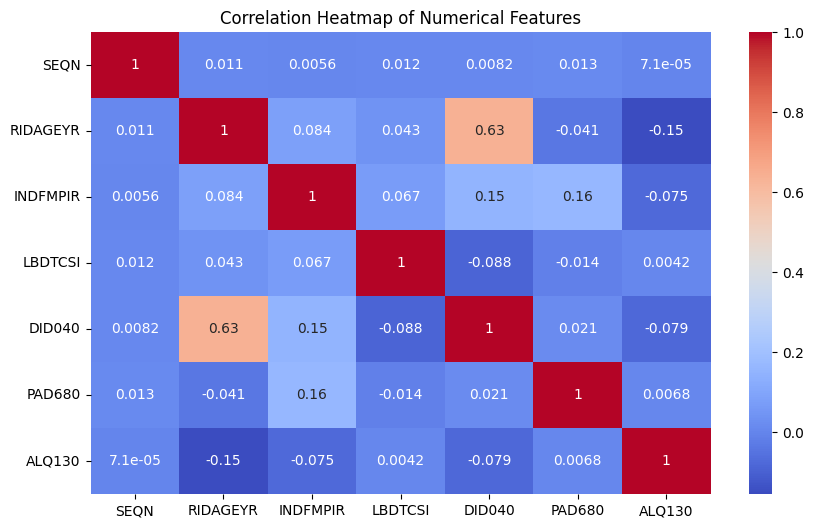

In [33]:
numeric_df = filtered_df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Relationship between categorical variables and Diabetes

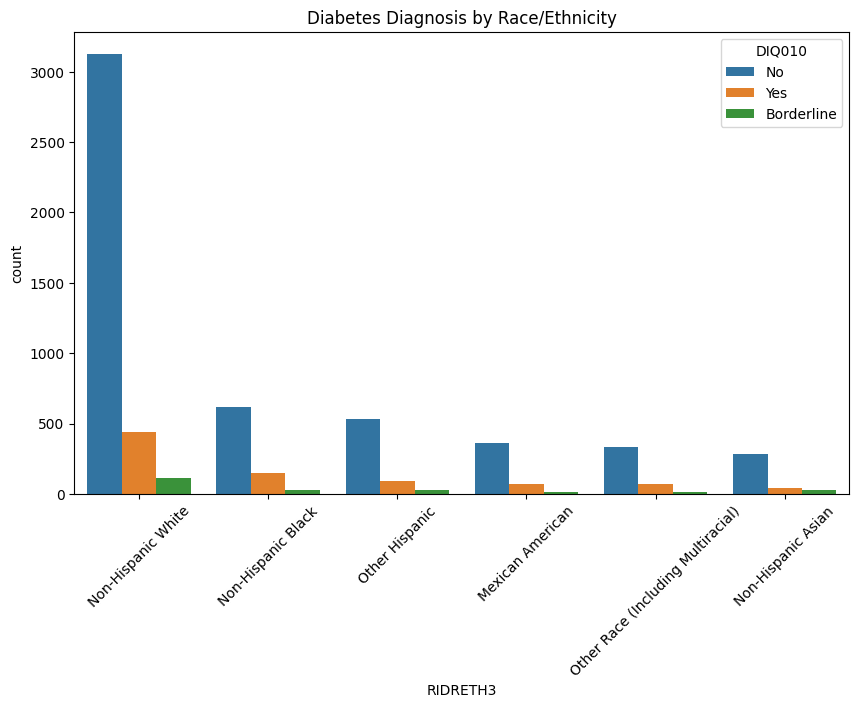

In [34]:
# Bar plot: Diabetes diagnosis by Race/Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x=filtered_df.get('RIDRETH3'), hue='DIQ010', data=filtered_df, order=filtered_df.get('RIDRETH3').value_counts().index)
plt.title('Diabetes Diagnosis by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

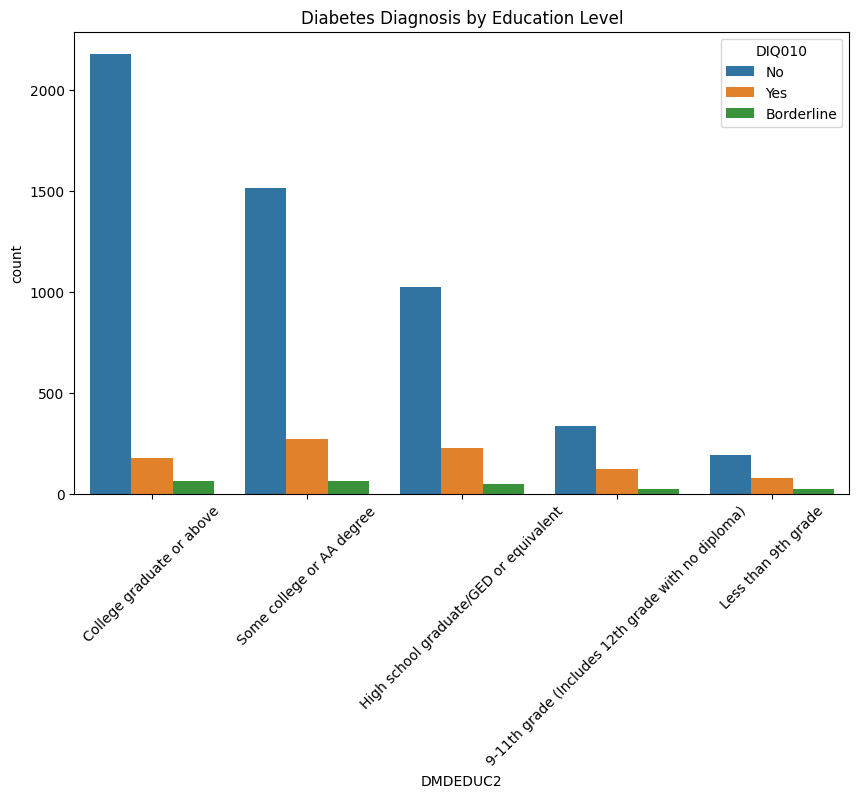

In [35]:
# Bar plot: Diabetes diagnosis by Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='DMDEDUC2', hue='DIQ010', data=filtered_df, order=filtered_df['DMDEDUC2'].value_counts().index)
plt.title('Diabetes Diagnosis by Education Level')
plt.xticks(rotation=45)
plt.show()

### Continuous features and diabetes

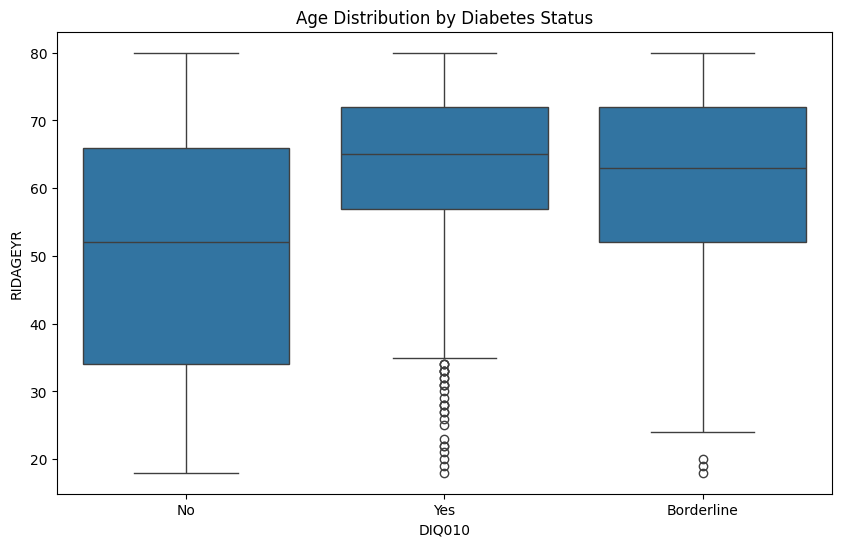

In [36]:
# Boxplot for Age vs Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='DIQ010', y='RIDAGEYR', data=filtered_df)
plt.title('Age Distribution by Diabetes Status')
plt.show()

### Multivariate Analysis

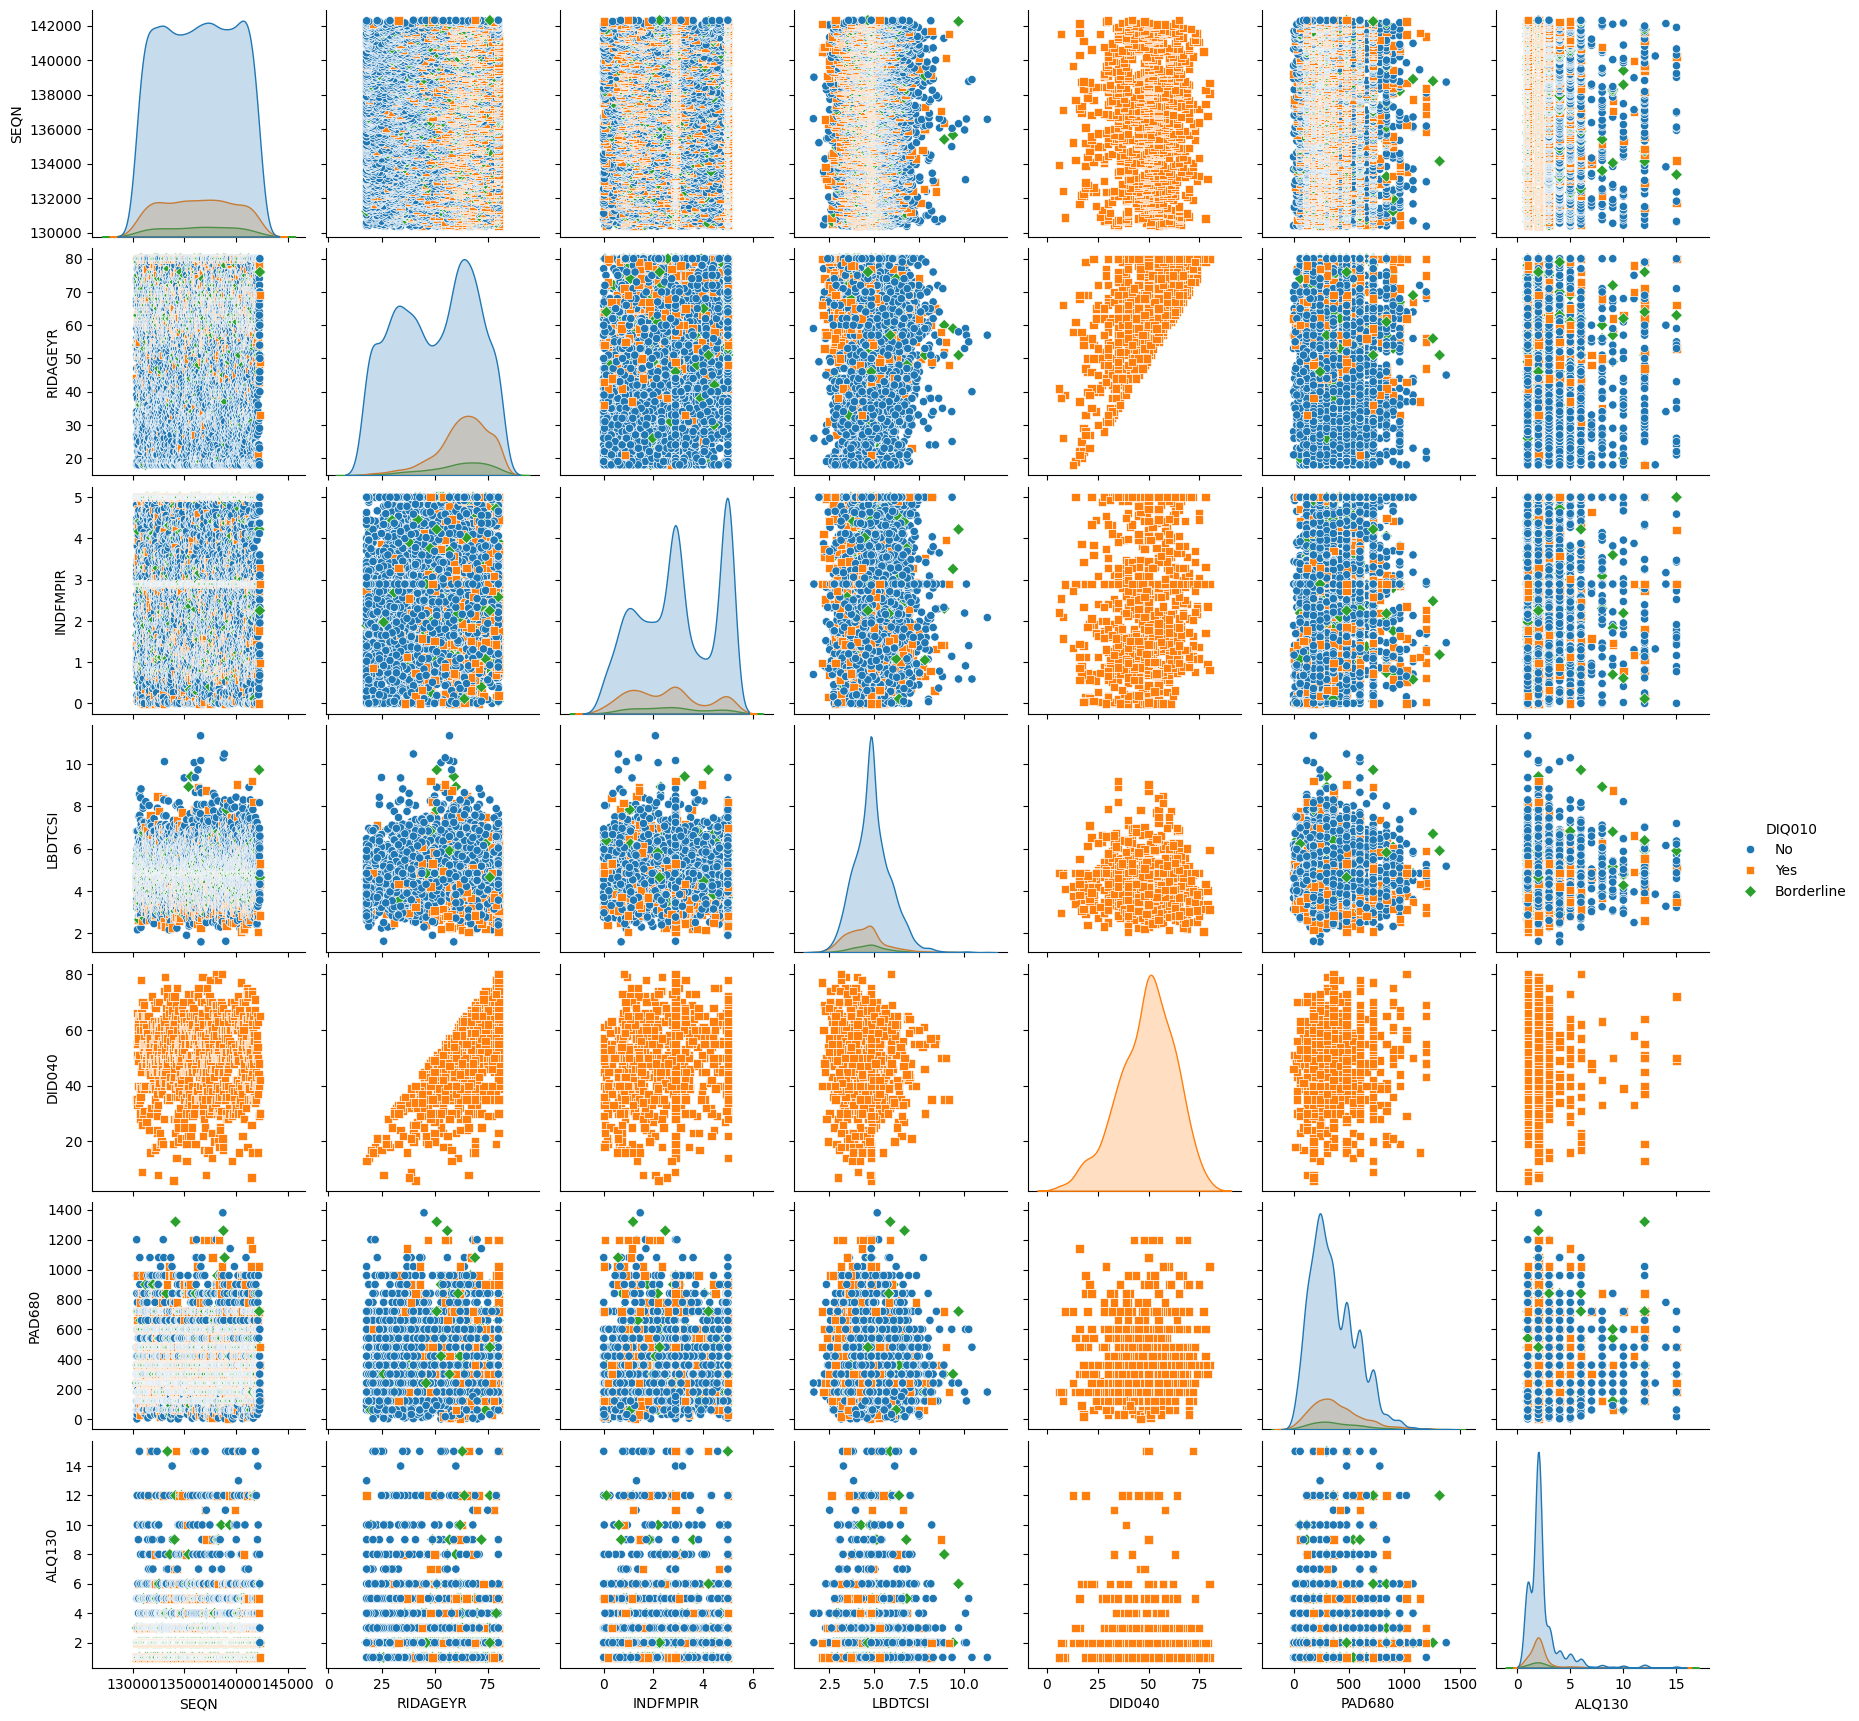

In [37]:
# Pairplot to visualize relationships between numerical features and diabetes status
sns.pairplot(filtered_df, hue='DIQ010', diag_kind='kde', markers=["o", "s", "D"])
plt.show()

In [38]:
# Cross-tabulation of Race/Ethnicity and Diabetes Status
pd.crosstab(filtered_df['RIDRETH3'], filtered_df['DIQ010'], normalize='index')


DIQ010,Borderline,No,Yes
RIDRETH3,,,
Mexican American,0.033482,0.810268,0.156250
Non-Hispanic Asian,0.079320,0.798867,0.121813
Non-Hispanic Black,0.035398,0.776233,0.188369
Non-Hispanic White,0.031488,0.848534,0.119978
Other Hispanic,0.038640,0.817620,0.143740
Other Race (Including Multiracial),0.026570,0.797101,0.176329
